<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/Temperature_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression on Temperature time series data

Coding activities:

* See a Youtube video from NASA inside our Notebook
* Download data from NOAA (National Oceanic and Atmospheric Administration)
* Import into Numpy array
* Analyse the data (visualize graphs)
* Perform a linear regression to see how much warming has happened from 1850 to 2023 in Earth. Do you have a number in mind?

## Importing Libraries

In [108]:
import numpy
import matplotlib.pyplot as plt

# How is Earth temperature changing over time?

The [NASA Goddard Space Flight Center](https://svs.gsfc.nasa.gov/5060) is one of our sources of global climate data. They produced the video below showing a color map of the changing global surface **temperature anomalies** from 1880 to 2015.

The term [global temperature anomaly](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) means the difference in temperature with respect to a reference value or a long-term average. It is a very useful way of looking at the problem and in many ways better than absolute temperature. For example, a winter month may be colder than average in Washington DC, and also in Miami, but the absolute temperatures will be different in both places.

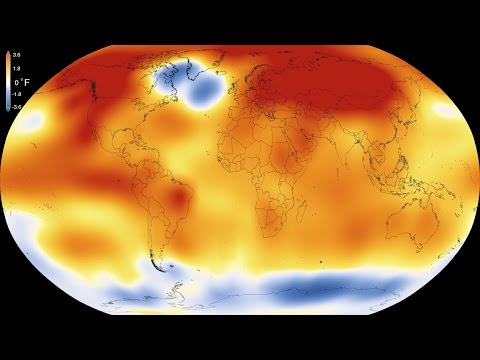

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0', width=850, height=400)

This visualization illustrates Earth’s long-term warming trend, showing temperature changes from 1880 to 2015 as a rolling five-year average. Orange colors represent temperatures that are warmer than the 1951-80 baseline average, and blues represent temperatures cooler than the baseline.

I downloaded the data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National Oceanic and Atmospheric Administration) website. Try ir yourself!


I uploaded the file named `land_global_temperature_anomaly-1850-2023.csv` in our GitHub folder. This file contains the year on the first column, and averages of land and ocean temperature anomaly listed sequentially on the second column, from the year 1901 to 2000. We will load the file, then make an initial plot to see what it looks like.

# 1. Get the data from GitHub

1. Access: https://github.com/stenoe/FEDS/tree/main/data
2. Download the file 'land_global_temperature_anomaly-1850-2023.csv' and upload it to your session storage directory


In [101]:
# Read the data
fname = 'land_global_temperature_anomaly-1850-2023.csv'
year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

In [102]:
temp_anomaly

array([-0.39, -0.13, -0.17, -0.02, -0.26, -0.01, -0.1 , -0.3 , -0.18,
       -0.12, -0.14, -0.48, -0.42, -0.06, -0.35, -0.05,  0.08, -0.22,
       -0.43, -0.15, -0.05, -0.28, -0.2 , -0.12, -0.05, -0.4 , -0.26,
       -0.15,  0.11, -0.06, -0.16, -0.16,  0.15, -0.33, -0.17, -0.58,
       -0.3 , -0.54, -0.29, -0.04, -0.36, -0.29, -0.22, -0.68, -0.35,
       -0.34, -0.17, -0.06,  0.  , -0.23, -0.3 , -0.13, -0.16, -0.15,
       -0.49, -0.26, -0.21, -0.36, -0.36, -0.5 , -0.3 , -0.54, -0.24,
       -0.34,  0.05, -0.18, -0.21, -0.61, -0.44, -0.15, -0.26, -0.09,
       -0.29, -0.25, -0.18, -0.37,  0.13, -0.28, -0.05, -0.42, -0.29,
       -0.08,  0.1 , -0.27, -0.26, -0.3 , -0.3 , -0.09,  0.07, -0.09,
        0.08,  0.22,  0.31, -0.03,  0.31,  0.18,  0.17, -0.03,  0.02,
        0.06, -0.2 , -0.31,  0.14,  0.07, -0.19,  0.13, -0.11, -0.06,
        0.35,  0.07,  0.05,  0.14,  0.08,  0.02, -0.08, -0.08, -0.14,
       -0.11, -0.18, -0.08,  0.15, -0.02, -0.24,  0.35, -0.08,  0.06,
       -0.01,  0.2 ,

In [103]:
year

array([1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857., 1858.,
       1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867.,
       1868., 1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876.,
       1877., 1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885.,
       1886., 1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894.,
       1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903.,
       1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912.,
       1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977.,

# 2. Plot the data

We are using **Matplotlib** module called `pyplot`, shortcut `plt`, for making 2D plots.

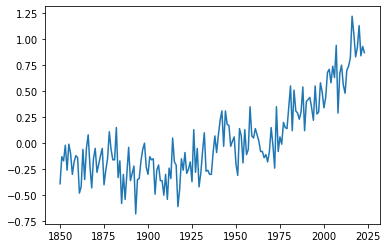

In [110]:
plt.plot(year, temp_anomaly);

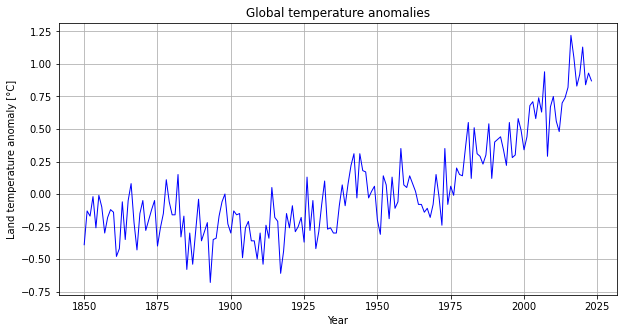

In [113]:
#You can set the size of the figure by doing:
plt.figure(figsize=(10,5))

#Plotting
plt.plot(year, temp_anomaly, color='blue', linestyle='-', linewidth=1) 
plt.title('Global temperature anomalies')
plt.xlabel('Year')
plt.ylabel('Land temperature anomaly [°C]')
plt.grid();

# 3. Linear Regression

Let's now fit a straight line through the temperature-anomaly data, to see the trend over time. We'll use least-squares linear regression to find the slope and intercept of a line 

$$y = a_1x+a_0$$

that fits our data.

Remember our coefficients are:

$$
    a_1 = \frac{ \sum_{i=0}^{n} y_{i} (x_i - \bar{x})}{\sum_{i=0}^{n} x_i (x_i - \bar{x})} \quad , \quad a_0  = \bar{y} - a_1\bar{x}
$$ 

Consider:

* x = year
* y = temp_anomaly


In [160]:
# calculate the mean values
year_mean = numpy.mean(year)
temp_anomaly_mean = numpy.mean(temp_anomaly)
# a_1 coefficient
a_1 = numpy.sum(temp_anomaly*(year - year_mean)) / numpy.sum(year*(year - year_mean)) 
# a_0 coefficient
a_0 = temp_anomaly_mean - a_1*year_mean

a_1, a_0

(0.005916763005780347, -11.41890351471663)

We now have the coefficients of a linear function that best fits our data. With them, we can compute the predicted values of temperature anomaly, according to our fit. 
Let's call `reg` the array obtined from evaluating $f(x)$ for all years.

In [161]:
reg = a_0 + a_1 * year

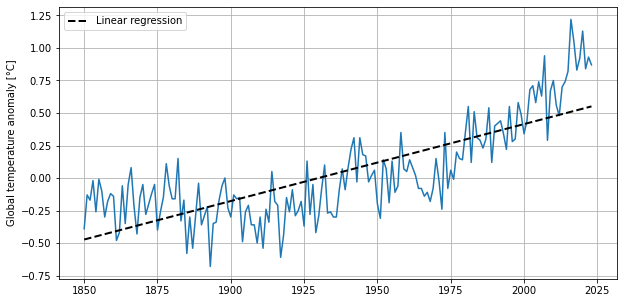

In [173]:
plt.figure(figsize=(10, 5))
plt.plot(year, temp_anomaly) 
plt.plot(year, reg, 'k--', linewidth=2, label='Linear regression')
plt.ylabel('Global temperature anomaly [°C]')
plt.legend()
plt.grid();

# 4. Apply regression using NumPy

Above, we coded linear regression from scratch. But, guess what: we didn't have to because NumPy has built-in functions that do what we need!

Yes! Python and NumPy are here to help! With [`polyfit()`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html), we get the slope and $y$-intercept of the line that best fits the data. With [`poly1d()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html), we can build the linear function from its slope and $y$-intercept.

Check it out:

In [163]:
# First fit with NumPy, then name the coefficients obtained a_1n, a_0n:
a_1new, a_0new = numpy.polyfit(year, temp_anomaly, 1)

f_linear = numpy.poly1d((a_1new, a_0new)) 
a_1new, a_0new

(0.005916763005780336, -11.418903514716604)

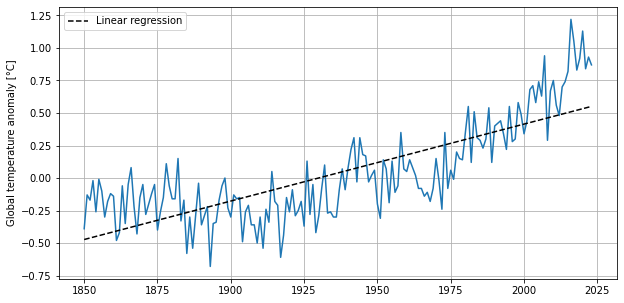

In [172]:
plt.figure(figsize=(10, 5))
plt.plot(year, temp_anomaly) 
plt.plot(year, f_linear(year), 'k--', label='Linear regression')
plt.ylabel('Global temperature anomaly [°C]')
plt.legend()
plt.grid();

## "Split regression"

If you look at the plot above, you might notice that around 1970 the temperature starts increasing faster that the previous trend. So maybe one single straight line does not give us a good-enough fit.

What if we break the data in two (before and after 1970) and do a linear regression in each segment? 

To do that, we first need to find the position in our `year` array where the year 1970 is located. Thankfully, NumPy has a function called  [`numpy.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) that can help us. We pass a condition and `numpy.where()` tells us where in the array the condition is `True`. 



In [165]:
numpy.where(year==1970)

(array([120]),)

To split the data, we use the powerful instrument of _slicing_ with the colon notation. Remember that a colon between two indices indicates a range of values from a `start` to an `end`. The rule is that `[start:end]` includes the element at index `start` but excludes the one at index `end`. For example, to grab the first 3 years in our `year` array, we do:

In [166]:
year[0:3]

array([1850., 1851., 1852.])

Now we know how to split our data in two sets, to get two regression lines. We need two slices of the arrays `year` and `temp_anomaly`, which we'll save in new variable names below. After that, we complete two linear fits using the helpful NumPy functions we learned above.

In [167]:
year_1 , temp_anomaly_1 = year[0:120], temp_anomaly[0:120]
year_2 , temp_anomaly_2 = year[120:], temp_anomaly[120:]

m1, b1 = numpy.polyfit(year_1, temp_anomaly_1, 1)
m2, b2 = numpy.polyfit(year_2, temp_anomaly_2, 1)

f_linear_1 = numpy.poly1d((m1, b1))
f_linear_2 = numpy.poly1d((m2, b2))

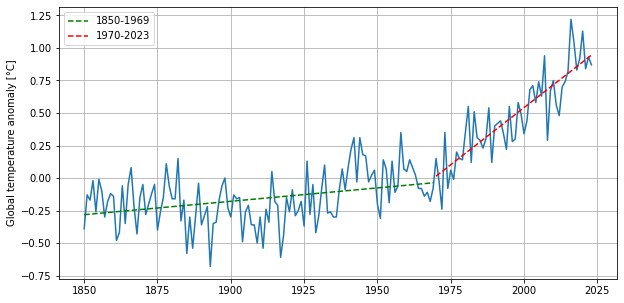

In [170]:
plt.figure(figsize=(10, 5))
plt.plot(year, temp_anomaly) 
plt.plot(year_1, f_linear_1(year_1), 'g--', label='1850-1969')
plt.plot(year_2, f_linear_2(year_2), 'r--', label='1970-2023')
plt.ylabel('Global temperature anomaly [°C]')
plt.legend()
plt.grid();

In [159]:
# Delta T from 1850 to 2023
f_linear_2(2023) - f_linear_1(1850)

1.2269951025405503

From this data we can say that Earth mean temperature has increased 1.23$^\circ$C since 1850.

## We learned:

* Making plots with matplotlib
* Applying linear regression to data
* NumPy built-ins for linear regression
* The Earth is warming up!


## Linear regression (deduction of the coefficients)

When we talk about linear regression we mean "fitting a straight line to the data", in other words, we want to find the best line that represents our data.  Thus,

$$
\begin{equation}
    f(x) = a_0 + a_1x
    \tag{1}
\end{equation}
$$

Using the **least-squares method** the function that we'll minimize is:

$$
\begin{equation}
    S(a_0, a_1) = \sum_{i=0}^{n} [y_i - f(x_i)]^2 = \sum_{i=0}^{n} (y_i - a_0 - a_1x_i)^2 \tag{2}
\end{equation}    
$$

From Calculus: to find the minimum you should derive it to the variables you want to change and make it equals to zero.
Equations (2) become:

$$
\begin{equation}
    \frac{\partial{S}}{\partial{a_0}} =  \sum_{i=0}^{n} -2(y_i - a_0 - a_1x_i) = 2 \left[ a_0(n+1) + a_1\sum_{i=0}^{n} x_i - \sum_{i=0}^{n} y_i \right] = 0 \tag{3}
\end{equation}    
$$

$$
\begin{equation}
    \frac{\partial{S}}{\partial{a_1}} =  \sum_{i=0}^{n} -2(y_i - a_0 - a_1x_i)x_i = 2 \left[ a_0\sum_{i=0}^{n} x_i + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i \right] = 0 \tag{4}
\end{equation}    
$$

Let's divide both equations by $2(n+1)$ and rearrange terms.

Rearranging (3) and (4):

$$
\begin{align}
    2 \left[ a_0(n+1) + a_1\sum_{i=0}^{n} x_i - \sum_{i=0}^{n} y_i \right] &= 0 \tag{5} \\ 
    \frac{a_0(n+1)}{n+1} + a_1 \frac{\sum_{i=0}^{n} x_i}{n+1} - \frac{\sum_{i=0}^{n} y_i}{n+1} &= 0 \tag{6} \\
\end{align}
$$

$$
\begin{align}
    a_0  = \bar{y} - a_1\bar{x} \tag{7}
\end{align}
$$

where $\bar{x} = \frac{\sum_{i=0}^{n} x_i}{n+1}$ and $\bar{y} = \frac{\sum_{i=0}^{n} y_i}{n+1}$.

Rearranging (5):

$$
\begin{align}
    2 \left[ a_0\sum_{i=0}^{n} x_i + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i \right] &= 0 \tag{8} \\
    a_0\sum_{i=0}^{n} x_i + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i &=0 \tag{9} \\
\end{align}
$$

Now, if we replace $a_0$ from equation (7) into (9) and rearrange terms:

$$
\begin{align*}
    (\bar{y} - a_1\bar{x})\sum_{i=0}^{n} x_i  + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  &= 0 \tag{10} \\ 
\end{align*}
$$

Replacing the definitions of the mean values into the equation,  

$$
\begin{align*}
    \left[\frac{1}{n+1}\sum_{i=0}^{n} y_i  - \frac{a_1}{n+1}\sum_{i=0}^{n} x_i \right]\sum_{i=0}^{n} x_i  + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  &= 0 \tag{11} \\ 
     \frac{1}{n+1}\sum_{i=0}^{n} y_i \sum_{i=0}^{n} x_i - \frac{a_1}{n+1}\sum_{i=0}^{n} x_i \sum_{i=0}^{n} x_i  + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  &= 0 \tag{12} \\ 
\end{align*}
$$

Leaving everything in terms of $\bar{x}$, 

$$
\begin{align*}
    \sum_{i=0}^{n} y_i \bar{x} - a_1\sum_{i=0}^{n} x_i \bar{x} + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  = 0 \tag{13}  
\end{align*}
$$

Grouping the terms that have $a_1$ on the left-hand side and the rest on the right-hand side:

$$
\begin{align*}
    a_1\left[ \sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_i \bar{x}\right] &= \sum_{i=0}^{n} x_iy_i - \sum_{i=0}^{n} y_i \bar{x} \tag{14} \\
    a_1 \sum_{i=0}^{n} (x_{i}^2 - x_i \bar{x}) &= \sum_{i=0}^{n} (x_iy_i -  y_i \bar{x}) \tag{15}   \\
    a_1 \sum_{i=0}^{n} x_{i}(x_{i} -\bar{x}) &= \sum_{i=0}^{n} y_i(x_i - \bar{x})    \tag{16}  
\end{align*}
$$

Finally, we get that:

$$
\begin{align}
    a_1 = \frac{ \sum_{i=0}^{n} y_{i} (x_i - \bar{x})}{\sum_{i=0}^{n} x_i (x_i - \bar{x})} \tag{17}  
\end{align}
$$

Replacing Equation (17) into Eq. (7) we can obtain the $a_0$ coefficient:

$$
\begin{align}
a_0  = \bar{y} - a_1\bar{x} \tag{18}  
\end{align}
$$